In [1]:
import pandas as pd

In [2]:
pd.options.display.max_rows = 10

source_file = pd.read_csv('customers-10000.csv')

print(source_file.head(2))

   Index  Organization Id            Name                    Website  \
0      1  522816eF8fdBE6d    Mckinney PLC           http://soto.com/   
1      2  70C7FBD7e6Aa3Ea  Cunningham LLC  http://harding-duffy.com/   

     Country                           Description  Founded Industry  \
0  Sri Lanka       Synergized global system engine     1988    Dairy   
1    Namibia  Team-oriented fault-tolerant adapter     2018  Library   

   Number of employees  
0                 3930  
1                 7871  


In [3]:
usecols = ["Organization Id", "Name", "Country", "Founded", "Industry", "Number of employees"]

df = pd.read_csv('customers-10000.csv', index_col="Organization Id", usecols=usecols)

print(df.head(5)) 

                                        Name  \
Organization Id                                
522816eF8fdBE6d                 Mckinney PLC   
70C7FBD7e6Aa3Ea               Cunningham LLC   
428B397eA2d7290                   Ruiz-Walls   
9D234Ae8Cc51C1c  Parrish, Osborne and Clarke   
6CDCcdE3D0b7b44       Diaz, Robles and Haley   

                                                           Country  Founded  \
Organization Id                                                               
522816eF8fdBE6d                                          Sri Lanka     1988   
70C7FBD7e6Aa3Ea                                            Namibia     2018   
428B397eA2d7290                                               Iran     2003   
9D234Ae8Cc51C1c  British Indian Ocean Territory (Chagos Archipe...     1989   
6CDCcdE3D0b7b44                                           Botswana     2013   

                               Industry  Number of employees  
Organization Id                               

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 522816eF8fdBE6d to 0D3b7DcFA21d92d
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 10000 non-null  object
 1   Country              10000 non-null  object
 2   Founded              10000 non-null  int64 
 3   Industry             10000 non-null  object
 4   Number of employees  10000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 468.8+ KB


In [5]:
duplicates_counter = 0

for i in df.duplicated():
    if i == True:
        duplicates_counter += 1
        
print(duplicates_counter)

0


In [6]:
df.aggregate({"Founded":['min', 'max']})

Founded
min     1970
max     2022

In [7]:
prev_cent_count = 0

for i in df["Founded"]:
    if i <= 2000:
        prev_cent_count += 1
        
print(prev_cent_count)

5911


In [8]:
for x in df.index:
    if df.loc[x, "Founded"] <= 2000:
        df.loc[x, "Founded"] = '20th century'
    else:
        df.loc[x, "Founded"] = '21th century'

In [9]:
prev_cent_count = 0

for i in df["Founded"]:
    if i == '20th century':
        prev_cent_count += 1
        
print(prev_cent_count)

5911


In [10]:
df.aggregate({"Founded":['min', 'max']})

Founded
min  20th century
max  21th century

In [11]:
desc = df["Number of employees"].describe()

print(desc["count"], desc["min"], desc["max"])

10000.0 1.0 9999.0


In [12]:
for x in df.index:
    if df.loc[x, "Number of employees"] < 1000:
        df.drop(x, inplace = True)

In [13]:
df["Number of employees"].describe()

count    8946.000000
mean     5485.608428
std      2619.216746
min      1001.000000
25%      3208.000000
50%      5456.500000
75%      7789.750000
max      9999.000000
Name: Number of employees, dtype: float64

In [14]:
df.groupby(['Industry']).groups

{'Accounting': ['56Cfc01C778Ae39', '3cB2B4b035BCeDf', 'eD6FBfeDCF0B5cB', '1F69bebEEc9bCCb', '89a36AfC3AAfd36', '0134f221640a777', 'b1f87fA7e111840', 'FCadb3e1cCA521c', '2c8E1FeC8A0b381', '82BAF2ccbC963b8', 'eE9cb27AA6f8aF3', '3FdFE1982be12FE', 'f6afA8BCe35197c', 'C412CFBf322CbbC', 'CcbaacbDaDFaaAB', '4c8870cB7459f01', 'C3c8FFa2BE5690A', 'DdcF6bCcBEAAeBd', 'B41F1d5b1ab7279', 'EEcb58Cb8Fa06fB', 'F3E77FB5aBF60cB', 'd1fF4c4Ae89D5FE', 'bDBDB8a4bDCA04c', 'EAaeAaCFfec8Fd9', 'A901e9AaAff3AdC', 'efC8d4DBeFA3059', '9B49EfE5ABF4605', 'CdF8B60D4EBaee7', '21cb4AEF4dd43BC', 'A18E4E91AD04c21', 'a92A3EF8f1A1964', 'ea112FA9AEcCe8A', 'Dfc6833AAD8373e', 'D3726B568A8B0E9', '5909Dbb9CbAd42f', '550e20FF8d0ca99', 'aa23ff02d7A3d5a', 'E82803Ae3b3A02d', '9910fA9d021CcF5', '3e6DA36e1AfB0f5', 'D509DCE7884E8Ba', 'eF20EaF2cCc6d53', 'afcaf8dfF56A44F', 'A9445B9fCDcecd7', '3A15B3520B0B22b', '6512fD11c3ca7A2', 'EeEda60bDB3587a', 'aFae3aa7b0eD9b7', '4bC4603AB0faEc1', 'CEdA8e2f5C5E60c', 'e5a8B81De6edAeA', '170bAeFcfcBF46

In [15]:
df["Industry"] = df["Industry"].str.upper() 

print(df)

                                        Name  \
Organization Id                                
522816eF8fdBE6d                 Mckinney PLC   
70C7FBD7e6Aa3Ea               Cunningham LLC   
428B397eA2d7290                   Ruiz-Walls   
9D234Ae8Cc51C1c  Parrish, Osborne and Clarke   
6CDCcdE3D0b7b44       Diaz, Robles and Haley   
...                                      ...   
2EE82AD1Cd045cd           Neal, Day and Wang   
06f1568A2CaF04a    Barrett, Rojas and Adkins   
B4B92A44e0331Bc               Franklin-Ayala   
01D2539e270CEbd                  Wolfe-Mckee   
0D3b7DcFA21d92d                     Beck LLC   

                                                           Country  \
Organization Id                                                      
522816eF8fdBE6d                                          Sri Lanka   
70C7FBD7e6Aa3Ea                                            Namibia   
428B397eA2d7290                                               Iran   
9D234Ae8Cc51C1c  British 

In [16]:
df["Industry"] = df["Industry"].replace("MEDIA PRODUCTION", "MEDIA")

In [17]:
filter = df["Industry"] == "MEDIA PRODUCTION"
 
df.where(filter).dropna()

Empty DataFrame
Columns: [Name, Country, Founded, Industry, Number of employees]
Index: []

In [18]:
filter = df["Industry"] == "MEDIA"
 
df.where(filter).dropna()

Name                   Country  \
Organization Id                                                             
cC57130E3F0da7c    Moreno, Caldwell and Estrada                    Turkey   
23Ab495Bb251AbC                      Booker Inc            Czech Republic   
b7eD0cfA9ce7aab                      Ingram LLC            Western Sahara   
175fFB5Bd89DCBF                     Salazar-Lee             French Guiana   
aFcafB5B53Ad991                   Ellison-Russo  Northern Mariana Islands   
...                                         ...                       ...   
fAC43Fc2e2e1aA9      Barron, Benitez and Flores             Liechtenstein   
cBcbc4cfb31872F                 Manning-Barrett              South Africa   
FDBbfF4aA6D8B02  Christian, Mendoza and Mullins                     Nepal   
Be71de763Ec5ae5       Hobbs, Herrera and Molina                     Chile   
cFCC78f9fA4B4e3                       Jones Ltd                 Mauritius   

                      Founded Industry  Number of employees  
Organization Id                                              
cC57130E3F0da7c  21th century    MEDIA               9785.0  
23Ab495Bb251AbC  21th century    MEDIA               9789.0  
b7eD0cfA9ce7aab  21th century    MEDIA               2697.0  
175fFB5Bd89DCBF  20th century    MEDIA               9953.0  
aFcafB5B53Ad991  20th century    MEDIA               2970.0  
...                       ...      ...                  ...  
fAC43Fc2e2e1aA9  21th century    MEDIA               3873.0  
cBcbc4cfb31872F  21th century    MEDIA               8946.0  
FDBbfF4aA6D8B02  20th century    MEDIA               7402.0  
Be71de763Ec5ae5  20th century    MEDIA               9843.0  
cFCC78f9fA4B4e3  20th century    MEDIA               5379.0  

[60 rows x 5 columns]

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# pip install matplotlib

<Axes: >

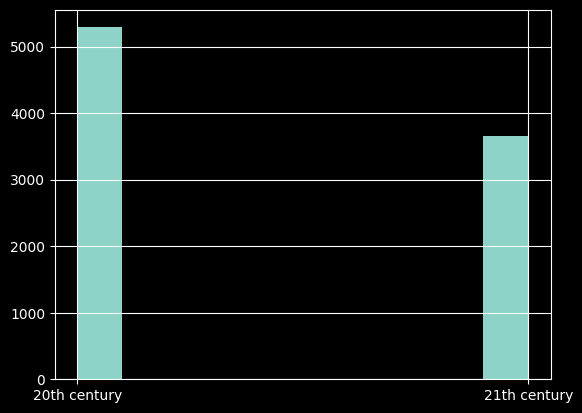

In [21]:
plt.style.use('dark_background') 

df["Founded"].hist()

<Axes: ylabel='Frequency'>

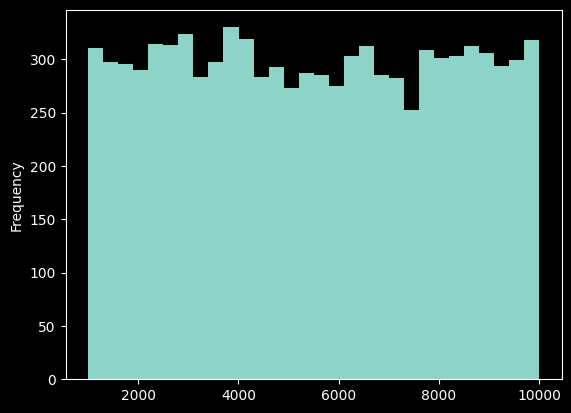

In [22]:
df["Number of employees"].plot.hist(bins=30)

In [23]:
df.to_csv("processed_data.csv")